# 

# Audio Reference Design

Hier wird erklärt wie das Audio Referenzdesign aus dem Base-Overlay entstanden ist. Prinzipiell wurde der Audioanteil aus dem Base-Overlay übernommen und die nicht benötigten Elemente entfernt. Die Einstellungen der Blöcke wurden ebenfalls übernommen. <br> <br> Um das Design in Vivado zu erhalten, wurde das Base-Overlay entsprechend der Anleitung auf dem [Pynq-Repo](https://github.com/Xilinx/PYNQ/tree/master) unter Linux neu generiert. \## Referenzdesign 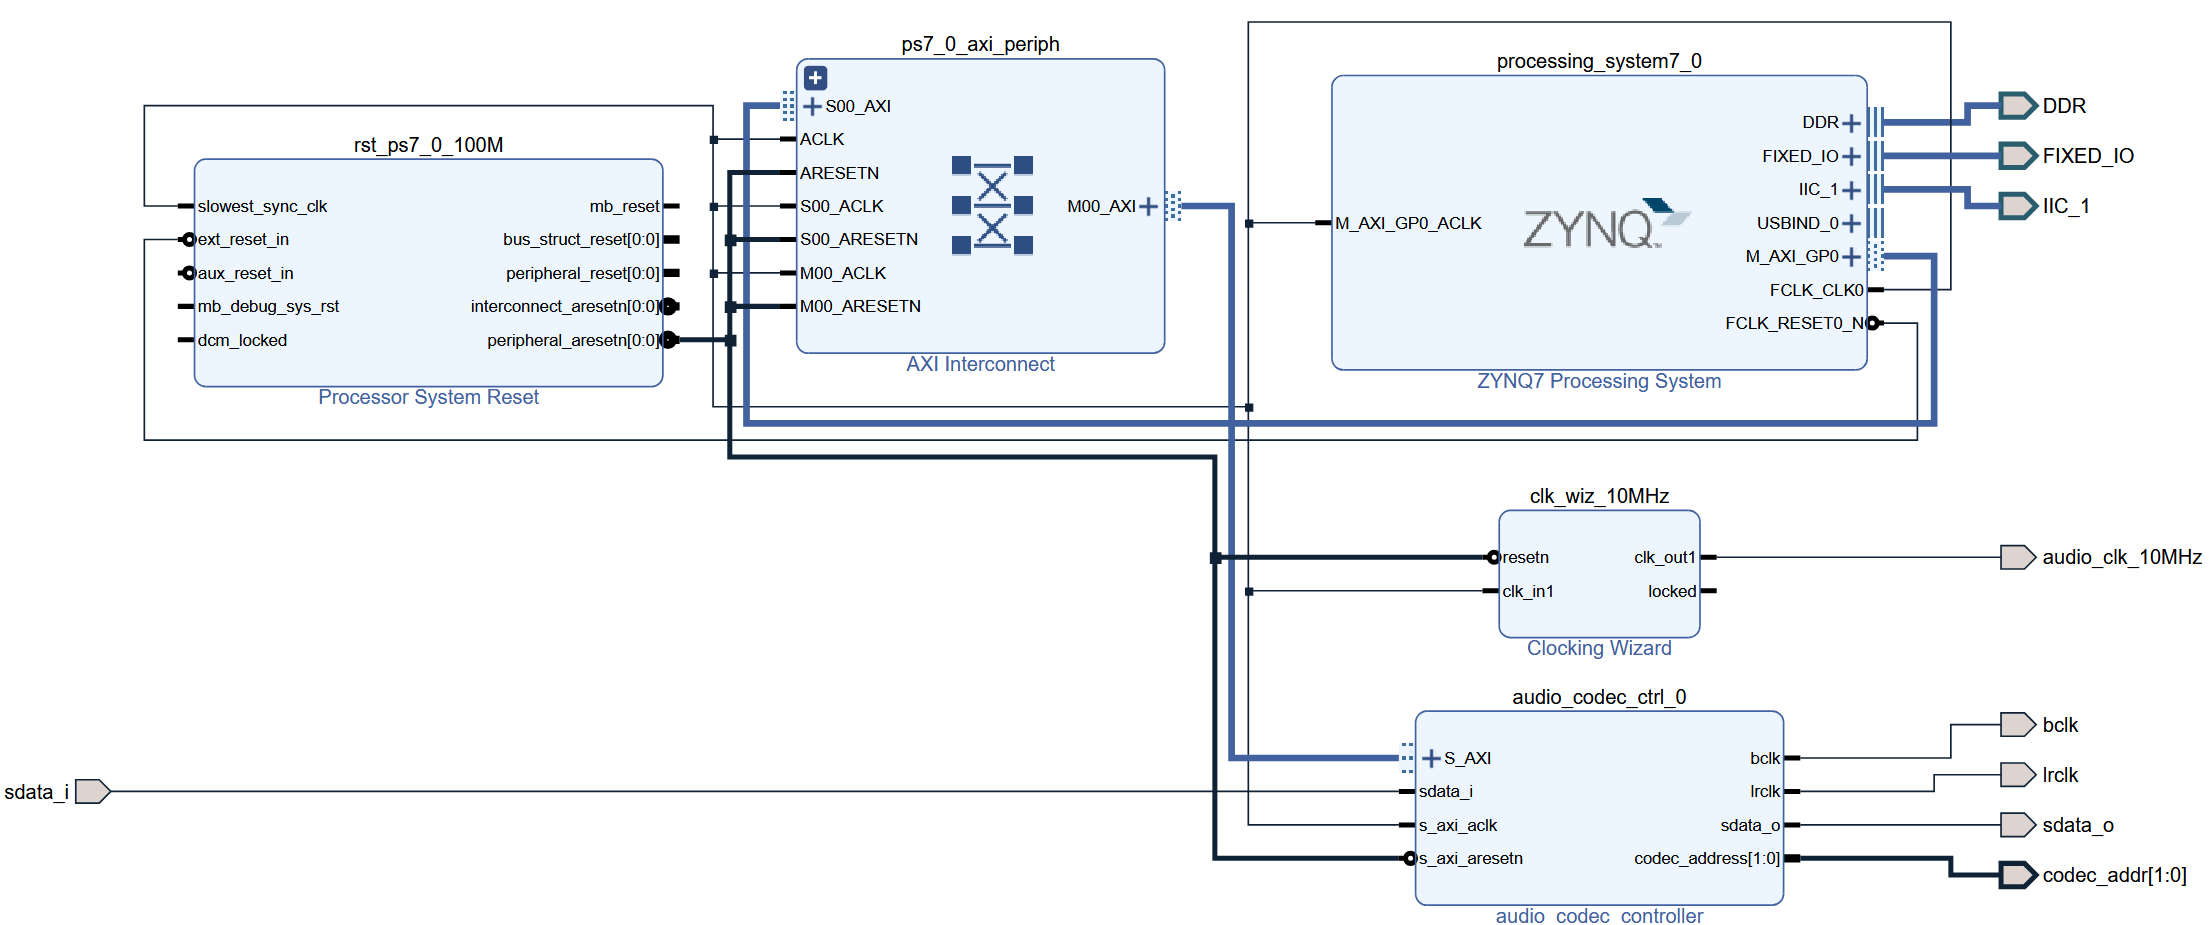  \### Einstellungen \#### Processing System (PS): In der Clock Config muss eines der Clock Signale auf 100 MHz eingestellt werden, da der *audio_codec_controller* nur 100 MHz Clock Signale akzeptiert. Sollte ein anderer Tackt gegeben werden, gibt es eine Warnung in Vivado. Zusätzlich muss ein ein I2C Port am PS eingeschaltet werden. Im Base-Overlay wurde hierfür *I2C1*.

#### Constraints:

Die Constraints entstammen aus dem [Pynq-Repo](https://github.com/Xilinx/PYNQ/tree/master). Alles, was nicht benötigt wurde auskommentiert. Die Constraints weisen unter anderem den Benötigten internen Pis Namen zu, damit diese besser nachvollzogen werden können. Es ist notwendig, dass die Namen an dem Ein- und Ausgängen aus den Constraints übernommen werden, sonst greifen die Treiber in Pynq nicht.

#### Clocking Wizzard:

Die Einstellungen des Clocking Wizzard wurden aus dem Base-Overlay übernommen. Die Aufgabe des Clocking Wizzard ist es den 10 MHz Master Clock für den Audio Codec und damit der I2S Übertragung zu generieren. Hier wird dieser aus dem 100 MHz Clock generiert. Dies kann auch direkt über den PS mit den entsprechenden Einstellungen generiert werden. Das Wichtige ist, das dieses Tackt-Signal nach außen an den richtigen Pin geführt wird. <br> **Zu den Einstellungen:** <br> 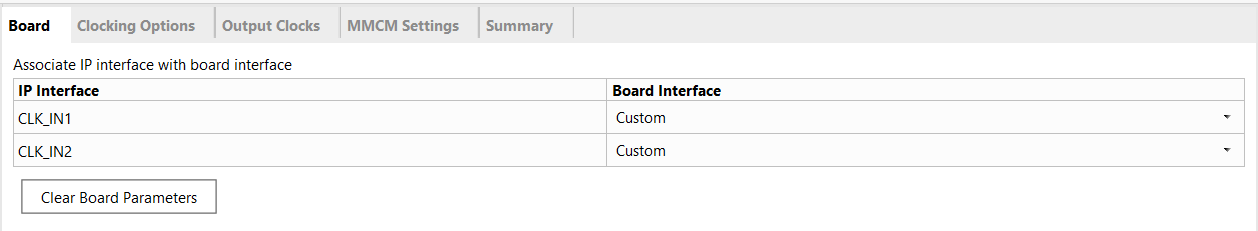 - Zur Sicherheit am Anfang die Board Parameter zurücksetzen. - *clk_in1* darf **nicht** auf *sys clock* eingestellt sein! <br> <br>

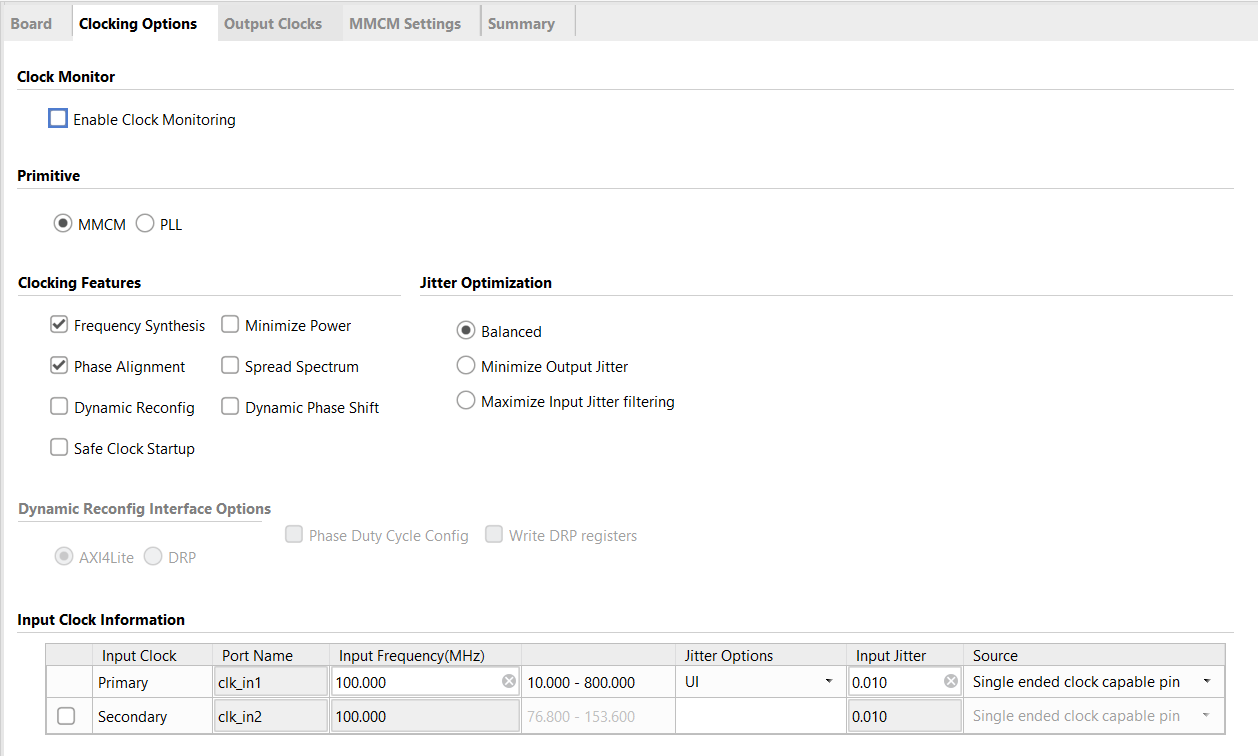 - Die Einstellungen sollten so aussehen. - Wichtig ist, dass unten die *Input Frequency(MHz)* von *clk_in1* auf 100MHz eingestellt ist. - Wenn ein Slider vorhanden ist, sollte dieser auf Auto gestellt werden, dann wird die Input Frequenz übernommen. - Die restlichen Einstellungen sollten bereits so sein. <br> <br>

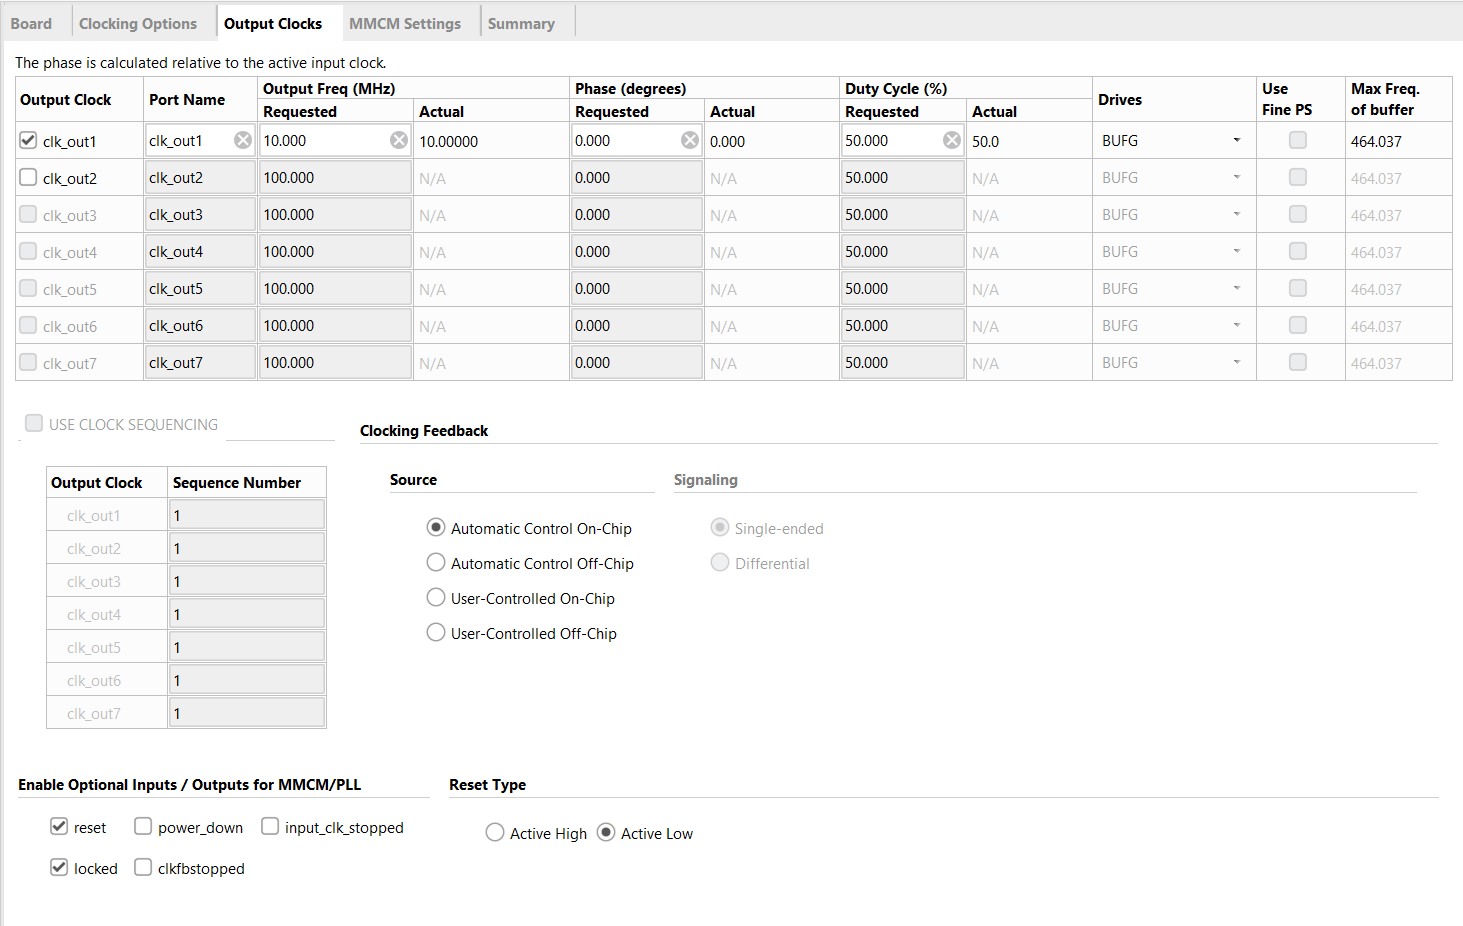 - Der *clk_out1* soll auf 10MHz eingestellt werden. - Der *Reset Type* soll auf *Active Low*, da derselbe Reset vom *codec_controller* verwendet werden soll und dieser ebenfalls *Active Low*. - Bei synchronisierten Rest kann dieser auch *Active High* sein. <br> <br>

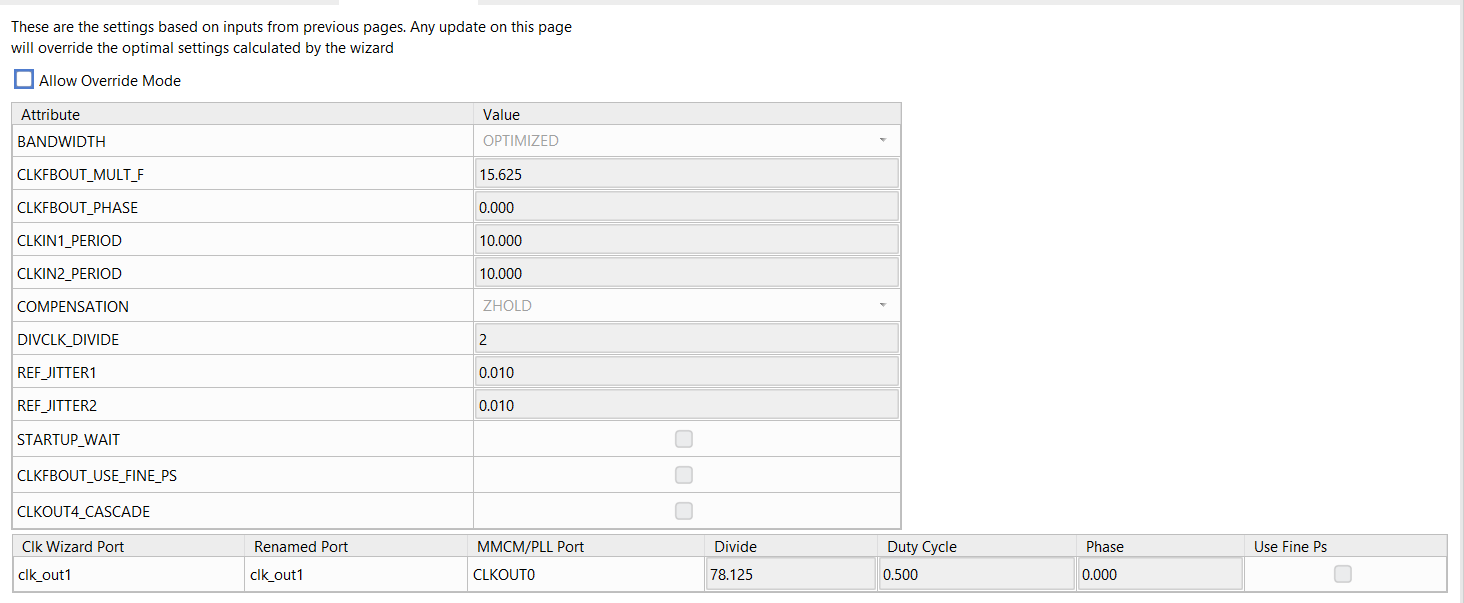 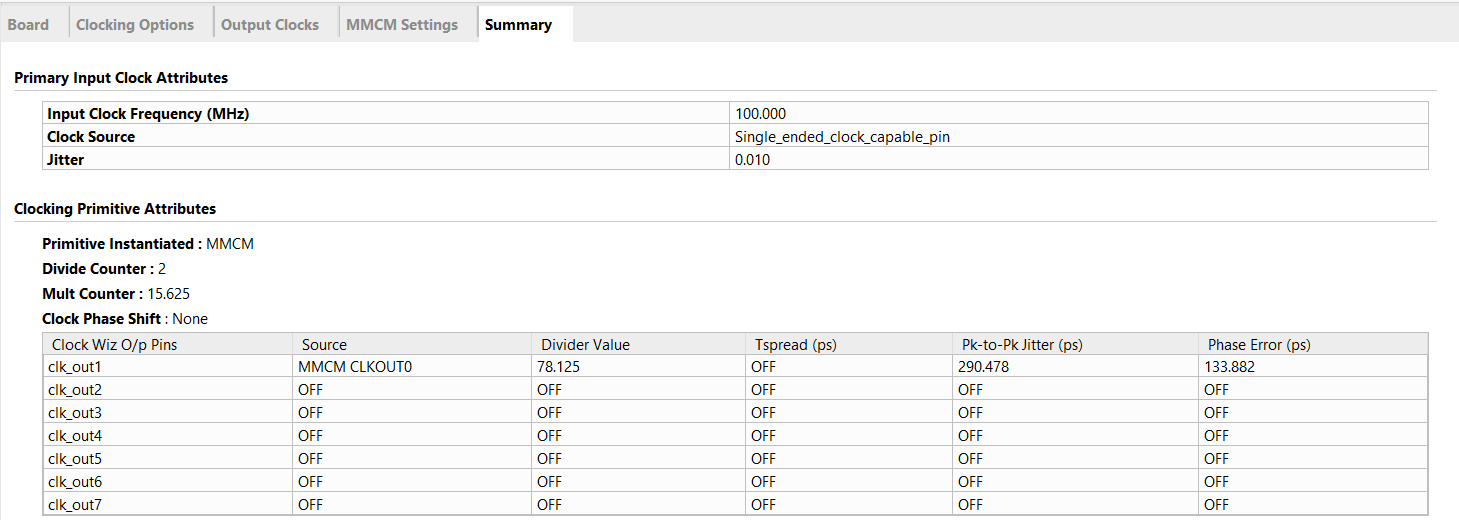 - Diese letzten beiden Tabs sollten dienen als Überblick der vorherigen Einstellungen und sollten am Ende so aussehen. - Falls nicht: Die vorherigen Einstellungen überprüfen.

#### Audio Codec Controller:

Der *audio_codec_controller* ist eine eigene IP aus dem [Pynq-Repo](https://github.com/Xilinx/PYNQ/tree/master) und generiert die vom Codec benötigten Signale sowie steuert den I2S Daten-Stream. Die Namen des Ein- und Ausgänge sowie der IP selbst müssen übereinstimmen, sonst greift der im Pynq enthaltene Audio-Treiber nicht bzw. es muss sonst der neue Name an den Treiber übergeben werden. <br> Die *Codec Address (addr1,addr0)* sollten in den Blockeinstellungen auf *11* bereits voreingestellt sein.

#### Anmerkungen:

Vivado wird Warnungen bezüglich *clk_in1* und *clk_out1* geben, da diese Clocksignale oft durch das Führen nach außen von Vivado als neuer Clock-Tree missinterpretiert werden, obwohl diese an dem Haubt Clock-Tree verbunden sind.<br> Diese Warnungen können entweder ignoriert werden oder es kann Vivado explizit die Zusammenhänge der Clocks mitgeteilt werden.

## Referenzdesign v2

Als Folge des Versuches Echtzeitfilterung umzusetzen entstand eine leicht veränderte Version des ursprügliches Referenzdesign. Dieses unterscheidet sich nur in der Art wie das 10MHz Clock Signal generiert wird. <br> 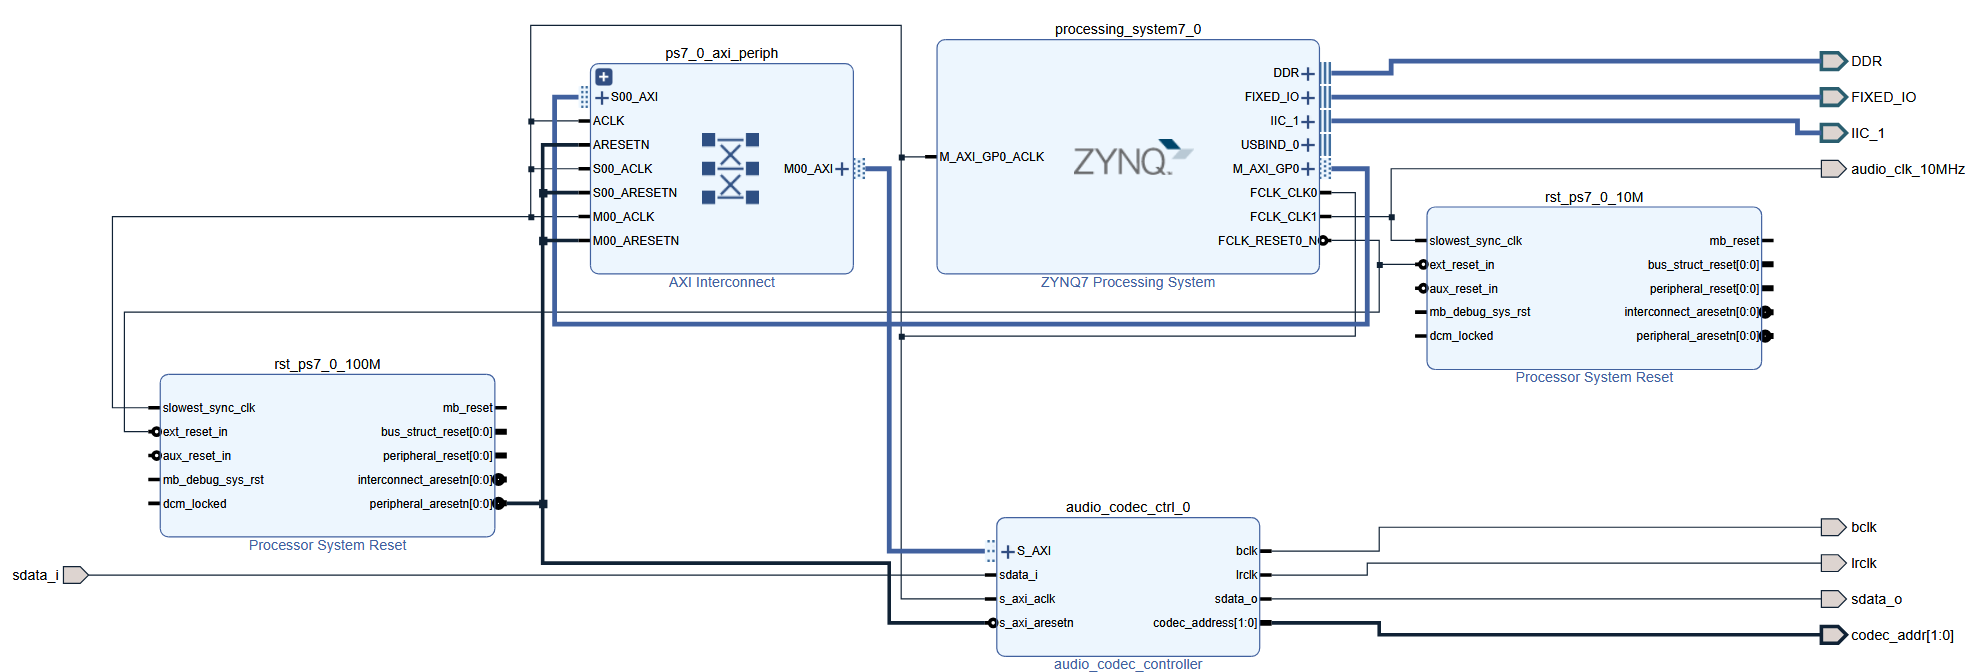 

In diesem aktualisierten Design wird das 10 MHz-Taktsignal direkt im Processing System (PS) erzeugt, mit einem synchronisierten Reset-Signal.<br> Der Vorteil dieses Ansatzes besteht darin, dass Vivado keine Probleme mit den Clock-Trees erkennt und entsprechend auch keine Warnungen ausgibt. Zusätzlich zum Taktsignal steht nun auch ein passendes, synchronisiertes Reset-Signal zur Verfügung. <br>

Das aktualisierte Design wird aller Voraussicht nach die Grundlage für zukünftige Implementierungen bilden.